# Modeling

## Introduction

In this project, we aim to build a predictive model to identify the factors associated with frequent mental distress among older adults. The focus is to understand how various demographic, health, and socio-economic factors can influence mental health outcomes, specifically the prevalence of mental distress. Using the **Alzheimer’s Disease and Healthy Aging Data**, the model leverages a variety of features, such as **age group**, **gender**, **state**, and **demographic variables** to predict the **Data_Value** associated with mental distress.

The target variable, **Data_Value**, represents the percentage of individuals experiencing frequent mental distress within a given group. Our goal is to explore how factors like age, gender, and geographical location (state) interact to affect mental health, and to build a robust model that can predict mental distress based on these inputs.

By incorporating demographic information such as **age group** (e.g., 65+), **gender**, and **state**, along with mental health data such as reported levels of distress, the model will provide valuable insights into which factors most strongly correlate with mental health challenges in the older population. The outcomes of this project can offer actionable insights for policymakers, healthcare providers, and community organizations working to improve the mental well-being of older adults.


## 1. Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Data

In [2]:
df = pd.read_csv('mental_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4778 entries, 0 to 4777
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  4778 non-null   int64  
 1   YearEnd                    4778 non-null   int64  
 2   State                      4681 non-null   object 
 3   Data_Value                 4778 non-null   float64
 4   Low_Confidence_Limit       4778 non-null   float64
 5   High_Confidence_Limit      4778 non-null   float64
 6   Age_group                  4778 non-null   object 
 7   Stratification2            4778 non-null   object 
 8   StratificationCategoryID2  4778 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 336.1+ KB


## 3. Prepare the data for further processing.

In [4]:
df = df.dropna(subset=['State'])

In [5]:
df.head()

,YearStart,YearEnd,State,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age_group,Stratification2,StratificationCategoryID2
0,2022,2022,MD,9.0,6.5,12.3,65+,"Black, non-Hispanic",RACE
1,2022,2022,WI,5.6,4.4,7.2,65+,Male,GENDER
2,2022,2022,OK,21.5,15.4,29.2,Overall,Native Am/Alaskan Native,RACE
3,2022,2022,PA,10.0,8.3,12.1,Overall,"White, non-Hispanic",RACE
4,2016,2016,NH,10.4,8.6,12.6,50-64,Female,GENDER


In [6]:
df_gender =df[df['StratificationCategoryID2'] == 'GENDER']

In [7]:
df_gender = df_gender.drop(columns=['StratificationCategoryID2', 'YearEnd', 'Low_Confidence_Limit', 'High_Confidence_Limit'])
df_gender = df_gender.rename(columns={'Stratification2': 'Gender','YearStart':'Year'})

In [8]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 1 to 4775
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        2381 non-null   int64  
 1   State       2381 non-null   object 
 2   Data_Value  2381 non-null   float64
 3   Age_group   2381 non-null   object 
 4   Gender      2381 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 111.6+ KB


In [9]:
df_gender

,Year,State,Data_Value,Age_group,Gender
1,2022,WI,5.6,65+,Male
4,2016,NH,10.4,50-64,Female
5,2022,NV,7.8,65+,Male
10,2022,KY,11.0,65+,Male
13,2022,OK,18.6,50-64,Female
...,...,...,...,...,...
4770,2018,WV,12.9,65+,Female
4772,2015,WY,7.6,65+,Female
4773,2017,WY,14.9,50-64,Female
4774,2016,WY,7.7,Overall,Male


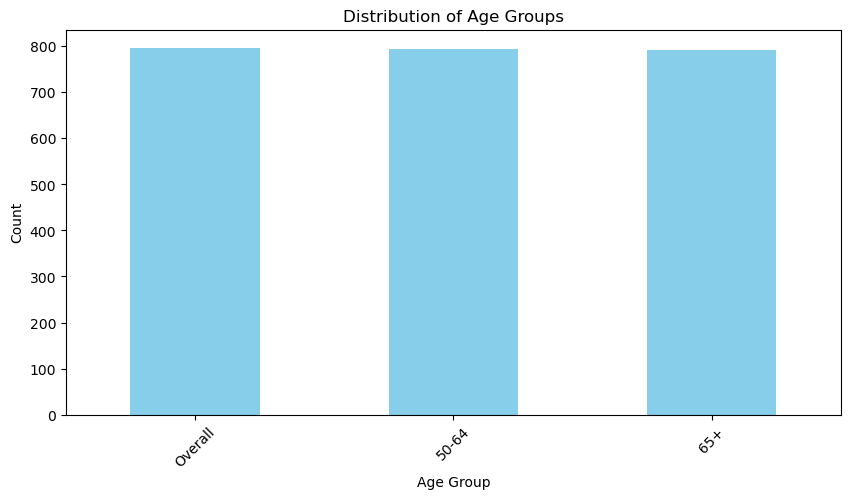

In [10]:
df_gender['Age_group'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

In [11]:
df_gender = df_gender[df_gender['Age_group'] != 'Overall']

In [12]:
df_gender.shape

(1585, 5)

In [13]:
print("Gender Value Counts:")
print(df_gender['Gender'].value_counts(), "\n")

print("Age Group Value Counts:")
print(df_gender['Age_group'].value_counts())

Gender Value Counts:
Female    796
Male      789
Name: Gender, dtype: int64 

Age Group Value Counts:
50-64    794
65+      791
Name: Age_group, dtype: int64


In [14]:
df_gender = df_gender.reset_index(drop=True)

In [15]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        1585 non-null   int64  
 1   State       1585 non-null   object 
 2   Data_Value  1585 non-null   float64
 3   Age_group   1585 non-null   object 
 4   Gender      1585 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 62.0+ KB


In [16]:
df_gender.head()

,Year,State,Data_Value,Age_group,Gender
0,2022,WI,5.6,65+,Male
1,2016,NH,10.4,50-64,Female
2,2022,NV,7.8,65+,Male
3,2022,KY,11.0,65+,Male
4,2022,OK,18.6,50-64,Female


## 4. Processing the data

In [17]:
# Encoding categorical variables
label_enc = LabelEncoder()
df_gender['State'] = label_enc.fit_transform(df_gender['State'])
df_gender['Age_group'] = label_enc.fit_transform(df_gender['Age_group'])
df_gender['Gender'] = label_enc.fit_transform(df_gender['Gender'])

In [18]:
df_gender

,Year,State,Data_Value,Age_group,Gender
0,2022,47,5.6,1,1
1,2016,29,10.4,0,0
2,2022,32,7.8,1,1
3,2022,16,11.0,1,1
4,2022,35,18.6,0,0
...,...,...,...,...,...
1580,2017,47,7.3,1,0
1581,2016,48,15.5,0,1
1582,2018,48,12.9,1,0
1583,2015,49,7.6,1,0


In [19]:
# Define features (X) and target variable (y)
X = df_gender.drop(columns=['Data_Value'])  # Features
y = df_gender['Data_Value']  # Target variable

In [20]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Defining the Model and Training the Data

Since the target variable is continuous, a Random Forest Regressor will be used for this dataset.

In [22]:
# Train a regression model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Make predictions
y_pred = model.predict(X_test_scaled)

## 6. Evaluate the model

In [24]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1.2962
Mean Squared Error (MSE): 2.7760
Root Mean Squared Error (RMSE): 1.6661
R² Score: 0.8284


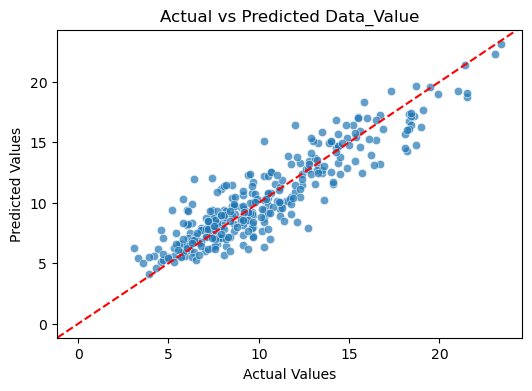

In [25]:
# Plot actual vs predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Data_Value")
plt.axline([0, 0], [1, 1], color='red', linestyle="--")  # Ideal fit line
plt.show()

## 7. Define a Tolerance (e.g., 20% of the actual value)

In [26]:
tolerance = 0.20  # 20% tolerance

# Calculate the absolute percentage error
percentage_error = np.abs((y_pred - y_test) / y_test)

# Count the number of predictions within the tolerance range
true_predictions = np.sum(percentage_error <= tolerance)

# Calculate the percentage of accurate predictions
true_prediction_percentage = (true_predictions / len(y_test)) * 100

print(f"Percentage of True Predictions (within {tolerance*100}% tolerance): {true_prediction_percentage:.2f}%")


Percentage of True Predictions (within 20.0% tolerance): 80.13%


## 8. Perform Randomized Search with Cross-Validation

In [27]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt']
}



# Perform Randomized Search with Cross-Validation
rf_random = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_grid, 
    n_iter=20,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the model
rf_random.fit(X_train, y_train)

# Best model predictions
y_pred_rf_tuned = rf_random.best_estimator_.predict(X_test)

# Best parameters
print("Best Hyperparameters:", rf_random.best_params_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': None}


In [28]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 30)


    
# Evaluate the tuned Random Forest model
evaluate_model(y_test, y_pred_rf_tuned, "Tuned Random Forest")


Tuned Random Forest Performance:
RMSE: 1.6072
R² Score: 0.8403
------------------------------


## Gradient Boosting Regressor Implementation
After training and evaluating the Random Forest Regressor, I am now implementing a Gradient Boosting Regressor (GBR) to compare performance.

In [29]:
from sklearn.ensemble import GradientBoostingRegressor


# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate Performance
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor Performance:")
print(f"RMSE: {rmse_gbr:.4f}")
print(f"R² Score: {r2_gbr:.4f}")


Gradient Boosting Regressor Performance:
RMSE: 1.7529
R² Score: 0.8101


## Gradient Boosting Regressor Results

These results show that the Gradient Boosting Regressor performs **quite well**, explaining approximately **81%** of the variance in the target variable. However, its performance is **slightly lower** than that of the Random Forest Regressor, which achieved:

- **RMSE:** 1.6360  
- **R² Score:** 0.8346  

Despite the slightly reduced performance, Gradient Boosting may still be preferred in some scenarios due to its ability to **reduce bias** and deliver **strong results with proper hyperparameter tuning**. 

Using GridSearchCV or Bayesian Optimization for tuning the Gradient Boosting Regressor to potentially enhance its predictive power.

In [30]:
from bayes_opt import BayesianOptimization
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the function to maximize
def gbr_cv(n_estimators, max_depth, learning_rate):
    model = GradientBoostingRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        random_state=42
    )
    # 5-fold cross validation, scoring with negative RMSE
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    return scores.mean()

# Define the parameter space
pbounds = {
    'n_estimators': (50, 300),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3)
}

# Create Bayesian optimizer
optimizer = BayesianOptimization(
    f=gbr_cv,
    pbounds=pbounds,
    random_state=42
)

# Maximize
optimizer.maximize(init_points=5, n_iter=25)

# Best result
print(optimizer.max)


|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | -1.827    | 0.1186    | 9.655     | 233.0     |
| 2         | -1.51     | 0.1836    | 4.092     | 89.0      |
| 3         | -1.766    | 0.02684   | 9.063     | 200.3     |
| 4         | -1.514    | 0.2153    | 3.144     | 292.5     |
| 5         | -1.533    | 0.2514    | 4.486     | 95.46     |
| 6         | -1.79     | 0.1287    | 9.943     | 50.21     |
| 7         | -2.215    | 0.01851   | 3.212     | 139.7     |
| 8         | -1.816    | 0.2853    | 9.824     | 270.4     |
| 9         | -1.793    | 0.07135   | 9.207     | 300.0     |
| 10        | -1.766    | 0.06672   | 9.965     | 78.4      |
| 11        | -1.511    | 0.2339    | 3.185     | 283.5     |
| 12        | -1.985    | 0.02464   | 3.225     | 176.8     |
| 13        | -1.835    | 0.139     | 9.945     | 110.1     |
| 14        | -1.829    | 0.2335    | 9.921     | 286.7     |
| 15    

In [31]:
gbr_optimized = GradientBoostingRegressor(
    learning_rate=0.176,
    max_depth=3,
    n_estimators=215,
    random_state=42
)

gbr_optimized.fit(X_train, y_train)
y_pred_opt = gbr_optimized.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_opt)
mse = mean_squared_error(y_test, y_pred_opt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_opt)

print("📊 Optimized Gradient Boosting Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

📊 Optimized Gradient Boosting Regressor Performance:
Mean Absolute Error (MAE): 1.1794
Mean Squared Error (MSE): 2.3291
Root Mean Squared Error (RMSE): 1.5261
R² Score: 0.8560
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=10, n_estimators=100; 

[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqr